In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import math

In [ ]:
def make_df(csvpath='ppchris.csv'):
    return pd.read_csv(os.path.join('.', csvpath))


In [ ]:
gptdf = make_df('gpt3_results_full_clean_2.csv')
# gptdf['GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()] = \
#     gptdf['GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()].fillna(value=' ')
ppdf = make_df('ppfull.csv')
# ppdf['HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()] = \
#     ppdf['HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()].fillna(value=' ', inplace=True)

In [ ]:
ppdf.drop('HDans HRans GenR GenD'.split(), axis=1, inplace=True)
gptdf = gptdf.join(ppdf.set_index('ID'), on='ID').drop('\
        HD1 HD2 HD3 HD4 \
        HR1 HR2 HR3 HR4 \
        '.split(), axis=1)

In [ ]:
def loadGloveModel(File = "/home/crytting/Downloads/glove.6B.300d.txt"):
    """
    load glove embeddings in to a dictionary
    """
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in tqdm(f):
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

glove_dic = loadGloveModel("/home/crytting/Downloads/glove.6B.300d.txt")

In [ ]:
def glove_word(word, glove_dic):
    """
    Return the glove embedding of a word, unless it's not in the dic, in which
    case return zeros
    """
    try:
        embed = glove_dic[word]
        return embed
    except:
        return np.zeros(300)
    

def apply_glove_model(phrase, glove_dic):
    """
    Get glove embedding from word or """
    try:
        toks = phrase.strip().split()
    except:
        if math.isnan(phrase):
            return np.NaN
        pass
    
    if len(toks) == 0:
        return glove_word("", glove_dic)
    
    if len(toks) == 1:
        return glove_word(toks[0], glove_dic)
    else:
        embeds = []
        for tok in toks:
            embeds.append(glove_word(tok, glove_dic)) 
    
        mean = np.mean(np.stack(embeds), axis=0)
        if isinstance(mean, float):
            print(mean)
        return mean


def generate_glove_col(df, col, glove_dic = None):
    if isinstance(glove_dic, str):
        glove_dic = loadGloveModel(glove_dic)
    values = df[col].str.lower().values
    result = [apply_glove_model(v, glove_dic) for v in values]
    df[col + "glove"] = result
    
# def avg_glove_cols(df, cols):
#     df = df[cols]
#     df.mean()
    

# def average_glove(df, cols):
#     dcols = cols[:4]
#     print(dcols)
#     rcols = cols[4:]
#     minid = df[dcols].head()
#     print(minid.head())
    
#     print(np.expand_dims(minid.as_matrix(), axis=1).mean()
#     df['glove_mean_D'] = df[dcols].mean(axis=0)
#     df['glove_mean_R'] = df[rcols].mean(axis=0)
#     sys.exit()
    

def process_gptdf(df, glove_dic=None):
    cols = 'GD1 GD2 GD3 GD4 GR1 GR2 GR3 GR4'.split()
    for col in cols:
        generate_glove_col(df, col, glove_dic)
    glove_cols = [col + 'glove' for col in cols]
#     average_glove(df, glove_cols)
        
def process_ppdf(df, glove_dic=None):
    cols = 'HD1 HD2 HD3 HD4 HR1 HR2 HR3 HR4'.split()
    for col in cols:
        generate_glove_col(df, col, glove_dic)
    glove_cols = [col + 'glove' for col in cols]
#     average_glove(df, glove_cols)

def ext

In [ ]:
process_gptdf(gptdf, glove_dic=glove_dic)
process_ppdf(ppdf, glove_dic=glove_dic)

In [ ]:
def generate_tsne(vecs):
    model = TSNE(n_components=2, random_state=0)
    result = model.fit_transform(vecs)
    df[col + "tsne_x"] = result[:,0]
    df[col + "tsne_y"] = result[:,1]


# David Playing on Friday 2/26

In [ ]:
tmp1 = []
for row in gptdf['GD1'].items():
    tmp1.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp2 = []
for row in gptdf['GD2'].items():
    tmp2.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp3 = []
for row in gptdf['GD3'].items():
    tmp3.append( glove_word(str(row[1]).lower().strip(), glove_dic) )

tmp4 = []
for row in gptdf['GD4'].items():
    tmp4.append( glove_word(str(row[1]).lower().strip(), glove_dic) )
      
    
    #    tmp.append( glove_word(row[1].lower().strip(), glove_dic) + glove_word(row[2].lower().strip(), glove_dic) + glove_word(row[3].lower().strip(), glove_dic) + glove_word(row[4].lower().strip(), glove_dic))
#np.atleast_2d(gptdf['GD1glove'])
ddata2 = np.atleast_2d(tmp1) + np.atleast_2d(tmp2) +np.atleast_2d(tmp3) +np.atleast_2d(tmp4)
print(ddata2.shape)

In [ ]:
gptdf

In [ ]:
ddata = np.atleast_2d(tmp)

In [ ]:
ddata.shape


In [ ]:
model = TSNE(n_components=2,random_state=0)
result =model.fit_transform(ddata)

In [ ]:
result.shape

In [ ]:
plt.scatter( result[:,0], result[:,1], s=0.1)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

In [ ]:
plt.scatter( result[:,0]+0.1*np.random.randn(2024), result[:,1]+0.1*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
plt.imshow(ddata[1:500,:])

In [ ]:
gptdf['PID7'].unique()


In [ ]:
mapper = {
    'Strong R':0,
    'Weak R':1,
    'Lean R':2,
    'Ind':3,
    'Lean D':4,
    'Weak D':5,
    'Strong D':6,
    np.nan:3,
}
pid_ints = []
for row in gptdf['PID7'].items():
    pid_ints.append(mapper[row[1]])


In [ ]:
jitter = 0.1

In [ ]:
pcamodel = PCA(n_components=50,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
pcamodel = PCA(n_components=10,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
# pcamodel = PCA(n_components=10,random_state=0)
# pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(ddata2)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(ddata2)

model2 = TSNE(n_components=2,random_state=0)
result2 =model.fit_transform(pcaresult)

plt.scatter( result2[:,0]+jitter*np.random.randn(2024), result2[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

In [ ]:
keeper = result2

In [ ]:
plt.scatter( keeper[:,0]+jitter*np.random.randn(2024), keeper[:,1]+jitter*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

txt = gptdf['GD1'].astype(str) + ' / ' + gptdf['GD2'].astype(str) + ' / ' + gptdf['GD3'].astype(str) + ' / ' + gptdf['GD4'].astype(str)

inds = np.random.randint(0,high=2024,size=100)
for ind in inds:
    plt.text(keeper[ind,0],keeper[ind,1],txt[ind][0:20])

In [ ]:
pcamodel = PCA(n_components=2,random_state=0)
result2 = pcamodel.fit_transform(ddata2)

plt.scatter( result2[:,0]+0.1*np.random.randn(2024), result2[:,1]+0.1*np.random.randn(2024), s=10, c=pid_ints)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

# David playing on 3/2

In [ ]:
def word_cleaner( word ):
    return str(word).lower().strip()

emba = []
inda = []
wora = []
dema = []

for ind in tqdm( range(gptdf.shape[0]) ):
    grow = gptdf.iloc[ind]
    hrow = ppdf.iloc[ind]

    for ptype in ['D','R']:
        for htype in ['G','H']:
            for wnum in range(4):
                
                if htype == 'H':
                    cleanw = word_cleaner( hrow['H'+ptype+str(wnum+1)] )
                    wemb = hrow['H'+ptype+str(wnum+1)+'glove']
                else:
                    cleanw = word_cleaner( grow['G'+ptype+str(wnum+1)] )
                    wemb = grow['G'+ptype+str(wnum+1)+'glove']
  
                if cleanw == 'liberal' or cleanw == 'conservative' or cleanw==np.nan or cleanw=='':
                    continue
                if np.sum(wemb) == 0:
                    continue
                if np.any(wemb==np.nan):# or wemb==float('nan') or wemb==np.NaN:
                    continue
                if type(wemb)==float:
                    continue

                if htype=='H':
                    dema.append( [hrow['ID'],htype,ptype,hrow['Ideo'],hrow['Gender'],hrow['PID7'],hrow['Inc']] )
                else:
                    dema.append( [grow['ID'],htype,ptype,grow['Ideo'],grow['Gender'],grow['PID7'],grow['Inc']])
                wora.append( cleanw )
                emba.append( wemb )
                inda.append( ind )
        

In [ ]:
emb_mat = np.vstack(emba)

In [ ]:
emb_mat.shape

In [ ]:
pcamodel = PCA(n_components=4,random_state=0)
pcaresult = pcamodel.fit_transform(emb_mat)

model3 = TSNE(n_components=2,random_state=0)
result3 =model3.fit_transform(pcaresult)


In [ ]:
pid_mapper = {
    'Strong R':0,
    'Weak R':1,
    'Lean R':2,
    'Ind':3,
    'Lean D':4,
    'Weak D':5,
    'Strong D':6,
    np.nan:3,
}

ideo_mapper = {
    'Extremely Liberal':0,
    'Liberal':1,
    'Slightly liberal':2,
    "Moderate/Haven't thought about it":3,
    'Slightly conservative':4,
    'Conservative':5,
    'Extremely conservative':6,
    np.nan:3,
}

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

In [ ]:
jitter = 0.0
NW = emb_mat.shape[0]


colors = [ pid_mapper[x[5]] for x in dema ] 
#colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( result3[:,0]+jitter*np.random.randn(NW), result3[:,1]+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(result3[ind,0],result3[ind,1],wora[ind][0:20])

In [ ]:
tmpdf = pd.DataFrame( emb_mat )
tmpdf.to_csv('./emb_data.csv',sep='\t')

In [ ]:
f = open('./word_list.txt','w')
print("word",file=f)
for w in wora:
    print( w, file=f)
f.close()

In [ ]:
pairs = [
    ['kind','heartless'],
    ['wealthy','impovershed'],
    ['racist','egalitarian'],
    ['arrogant','humble'],
    ['lazy','industrious'],
    ['generous','stingy'],
    ['intelligent','stupid'],
    ['happy','miserable'],
    ['religious','atheist']
]

projmat = np.zeros((len(pairs),300))
for ind, p in enumerate(pairs):
    projmat[ind,:] = np.atleast_2d( glove_word(p[0],glove_dic=glove_dic)-glove_word(p[1],glove_dic=glove_dic) )

lowdmat = np.dot( emb_mat, projmat.T )

In [ ]:
model4 = TSNE(n_components=2,random_state=0)
result4 =model4.fit_transform(lowdmat)

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0
NW = emb_mat.shape[0]

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( result4[:,0]+jitter*np.random.randn(NW), result4[:,1]+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(result4[ind,0],result4[ind,1],wora[ind][0:20])

In [ ]:
tmp = np.atleast_1d(wora)

In [ ]:
np.sum( np.logical_and( tmp=='racist', np.atleast_1d(colors)==0) )

In [ ]:
jitter = 0.0
NW = emb_mat.shape[0]

colors = [ pid_mapper[x[5]] for x in dema ] 
#colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( c1.ravel()+jitter*np.random.randn(NW), c2.ravel()+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(c1[ind,0],c2[ind,0],wora[ind][0:20])

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.figure()

pids = [ pid_mapper[x[5]] for x in dema ] 
targ_dems = [ x[2] == 'D' for x in dema ]
targ_reps = [ x[2] == 'R' for x in dema ]
is_human = [ x[1] == 'H' for x in dema ]
is_gpt3  = [ x[1] == 'G' for x in dema ]

plt.rcParams['figure.figsize'] = [16,4]
plt.figure()

for pid in range(7):
    plt.subplot(1,7,pid+1)
    #plt.hist( c1[ np.logical_and(np.atleast_1d(colors)==pid,targ_dems),0], bins=20 )
    #plt.hist( c1[ np.logical_and(np.atleast_1d(colors)==pid,targ_reps),0], bins=20 )
    plt.hist( c1[np.atleast_1d(colors)==pid,0], bins=20 )



In [ ]:
pcamodel = PCA(n_components=2,random_state=0)
pcaresult = pcamodel.fit_transform(lowdmat)

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0
NW = emb_mat.shape[0]

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x[3]] for x in dema ] 

plt.scatter( result4[:,0]+jitter*np.random.randn(NW), result4[:,1]+jitter*np.random.randn(NW), s=10, c=colors,cmap='jet')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.colorbar()

inds = np.random.randint(0,high=NW,size=100)
for ind in inds:
    plt.text(result4[ind,0],result4[ind,1],wora[ind][0:20])

# Chris on 3/4

In [ ]:
ppdf.shape

In [ ]:
gptdf.shape

In [ ]:
# def word_cleaner( word ):
#     return str(word).lower().strip()

# emba = []
# inda = []
# wora = []
# dema = []

# for ind in tqdm( range(gptdf.shape[0]) ):
#     grow = gptdf.iloc[ind]
#     hrow = ppdf.iloc[ind]

#     for ptype in ['D','R']:
#         for htype in ['G','H']:
#             for wnum in range(4):
                
#                 if htype == 'H':
#                     cleanw = word_cleaner( hrow['H'+ptype+str(wnum+1)] )
#                     wemb = hrow['H'+ptype+str(wnum+1)+'glove']
#                 else:
#                     cleanw = word_cleaner( grow['G'+ptype+str(wnum+1)] )
#                     wemb = grow['G'+ptype+str(wnum+1)+'glove']
  
#                 if cleanw == 'liberal' or cleanw == 'conservative' or cleanw==np.nan or cleanw=='':
#                     continue
#                 if np.sum(wemb) == 0:
#                     continue
#                 if np.any(wemb==np.nan):# or wemb==float('nan') or wemb==np.NaN:
#                     continue
#                 if type(wemb)==float:
#                     continue

#                 if htype=='H':
#                     dema.append( [hrow['ID'],htype,ptype,hrow['Ideo'],hrow['Gender'],hrow['PID7'],hrow['Inc']] )
#                 else:
#                     dema.append( [grow['ID'],htype,ptype,grow['Ideo'],grow['Gender'],grow['PID7'],grow['Inc']])
#                 wora.append( cleanw )
#                 emba.append( wemb )
#                 inda.append( ind )


In [ ]:
def word_cleaner( word ):
    return str(word).lower().strip()

emba = []
inda = []
wora = []
ida = []
idea = []
gena = []
pida = []
inca = []
ptypea = []
htypea = []

for ind in ( range(gptdf.shape[0]) ):
    row = gptdf.iloc[ind]
    htype = "G"
    for ptype in ['D','R']:
        for wnum in range(4):

            cleanw = word_cleaner( row['G'+ptype+str(wnum+1)] )
            wemb = row['G'+ptype+str(wnum+1)+'glove']

            if cleanw == 'liberal' or cleanw == 'conservative' or cleanw==np.nan or cleanw=='':
                continue
            if np.sum(wemb) == 0:
                continue
            if np.any(wemb==np.nan):# or wemb==float('nan') or wemb==np.NaN:
                continue
            if type(wemb)==float:
                continue

            emba.append( wemb )
            inda.append( ind )
            wora.append( cleanw )
            ida.append( row['ID'] )
            idea.append( row['Ideo'] )
            gena.append( row['Gender'] )
            pida.append( row['PID7'])
            inca.append( row['Inc'])
            ptypea.append( ptype )
            htypea.append( htype )
                
for ind in ( range( ppdf.shape[0]) ):
    row = ppdf.iloc[ind]
    htype = "H"
    for ptype in ['D','R']:
        for wnum in range(4):

            cleanw = word_cleaner( row['H'+ptype+str(wnum+1)] )
            wemb = row['H'+ptype+str(wnum+1)+'glove']

            if cleanw == 'liberal' or cleanw == 'conservative' or cleanw==np.nan or cleanw=='':
                continue
            if np.sum(wemb) == 0:
                continue
            if np.any(wemb==np.nan):# or wemb==float('nan') or wemb==np.NaN:
                continue
            if type(wemb)==float:
                continue

            emba.append( wemb )
            inda.append( ind )
            wora.append( cleanw )
            ida.append( row['ID'] )
            idea.append( row['Ideo'] )
            gena.append( row['Gender'] )
            pida.append( row['PID7'])
            inca.append( row['Inc'])
            ptypea.append( ptype )
            htypea.append( htype )


In [516]:
import itertools

high_comp = "intelligent.smart.competent.wise.able".split('.')
low_comp = "dumb.idiotic.stupid.dull.incompetent.incapable".split('.')
comp_pairs = itertools.product(high_comp, low_comp)
comp_axes = [glove_word(high, glove_dic) - glove_word(low, glove_dic) for high,low in comp_pairs]
comp_axis = np.mean(np.vstack(comp_axes), axis = 0)

In [521]:
list(itertools.product(high_comp,low_comp))

[('intelligent', 'dumb'),
 ('intelligent', 'idiotic'),
 ('intelligent', 'stupid'),
 ('intelligent', 'dull'),
 ('intelligent', 'incompetent'),
 ('intelligent', 'incapable'),
 ('smart', 'dumb'),
 ('smart', 'idiotic'),
 ('smart', 'stupid'),
 ('smart', 'dull'),
 ('smart', 'incompetent'),
 ('smart', 'incapable'),
 ('competent', 'dumb'),
 ('competent', 'idiotic'),
 ('competent', 'stupid'),
 ('competent', 'dull'),
 ('competent', 'incompetent'),
 ('competent', 'incapable'),
 ('wise', 'dumb'),
 ('wise', 'idiotic'),
 ('wise', 'stupid'),
 ('wise', 'dull'),
 ('wise', 'incompetent'),
 ('wise', 'incapable'),
 ('able', 'dumb'),
 ('able', 'idiotic'),
 ('able', 'stupid'),
 ('able', 'dull'),
 ('able', 'incompetent'),
 ('able', 'incapable')]

In [517]:
list(zip(comp_pairs))

[]

In [ ]:
high_warmth = "good.kind.nice.selfless.noble".split('.')
low_warmth = "bad.mean.selfish.evil".split('.')
warmth_pairs = itertools.product(high_warmth, low_warmth)
warmth_axes = [glove_word(high, glove_dic) - glove_word(low, glove_dic) for high,low in warmth_pairs]
warmth_axis = np.mean(np.vstack(warmth_axes), axis = 0)

In [ ]:
comp_axis.shape

In [ ]:
warmth_axis.shape

In [ ]:
embmat = np.vstack(emba)

compvec = np.dot(embmat, comp_axis)
warmthvec = np.dot(embmat, warmth_axis)

In [ ]:
compvec.shape

In [ ]:
warmthvec.shape

In [ ]:
rep_mask = [i for i,val in enumerate(ptypea) if val=='R']
dem_mask = [i for i,val in enumerate(ptypea) if val=='D']

In [ ]:
def rvec(vec):
    return [elem for i,elem in enumerate(vec) if i in rep_mask]

def dvec(vec):
    return [elem for i,elem in enumerate(vec) if i in dem_mask]


In [ ]:
gpt_mask = [i for i, val in enumerate(htypea) if val=='G']
hum_mask = [i for i, val in enumerate(htypea) if val=='H']

In [ ]:
def gvec(vec):
    return [elem for i,elem in enumerate(vec) if i in gpt_mask]

def hvec(vec):
    return [elem for i,elem in enumerate(vec) if i in hum_mask]

In [ ]:
gr_mask = [i for i,(p,h) in enumerate(zip(ptypea,htypea)) if p == 'R' and h == 'G']
gd_mask = [i for i,(p,h) in enumerate(zip(ptypea,htypea)) if p == 'D' and h == 'G']
hr_mask = [i for i,(p,h) in enumerate(zip(ptypea,htypea)) if p == 'R' and h == 'H']
hd_mask = [i for i,(p,h) in enumerate(zip(ptypea,htypea)) if p == 'D' and h == 'H']

In [ ]:
def grvec(vec):
    return [elem for i, elem in enumerate(vec) if i in gr_mask]

def gdvec(vec):
    return [elem for i, elem in enumerate(vec) if i in gd_mask]

def hrvec(vec):
    return [elem for i, elem in enumerate(vec) if i in hr_mask]

def hdvec(vec):
    return [elem for i, elem in enumerate(vec) if i in hd_mask]

# Humans and GPT-3 Describing Democrats and Republicans

In [475]:
dcompvec = dvec(compvec)
dwarmthvec = dvec(warmthvec)
didea = dvec(idea)
dwora = dvec(wora)

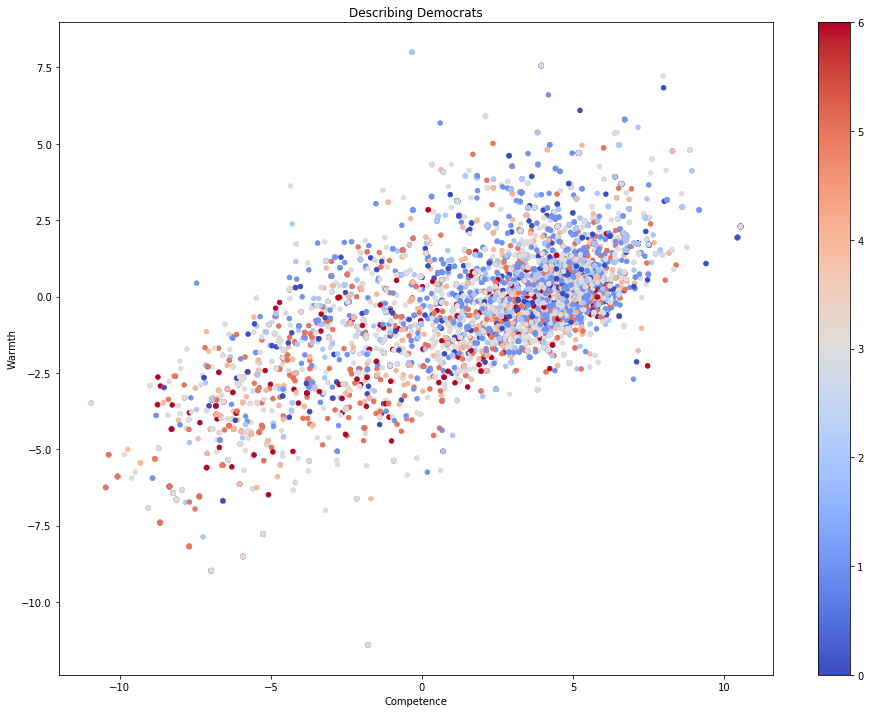

In [476]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0


NW = len(dcompvec)

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x] for x in didea] 

plt.title("Describing Democrats")
plt.scatter( dcompvec+jitter*np.random.randn(NW), dwarmthvec+jitter*np.random.randn(NW), s=20, c=colors,cmap='coolwarm')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.xlabel("Competence")
plt.ylabel("Warmth")
plt.colorbar()

# inds = np.random.randint(0,high=NW,size=100)
# for ind in inds:
#     plt.text(dcompvec[ind],dwarmthvec[ind],dwora[ind])
plt.show()

In [477]:
rcompvec = rvec(compvec)
rwarmthvec = rvec(warmthvec)
ridea = rvec(idea)
rwora = rvec(wora)

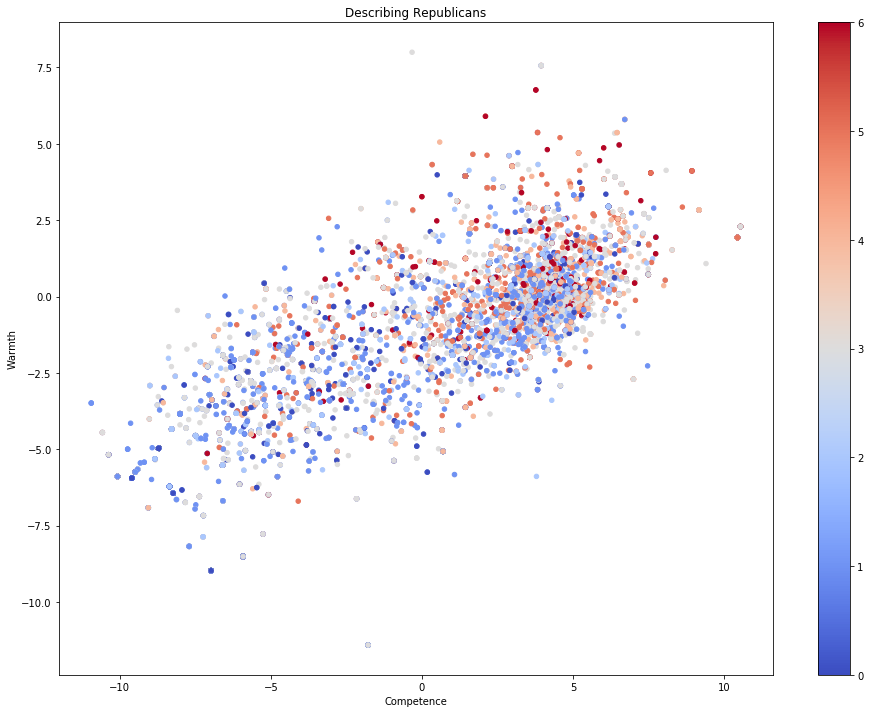

In [478]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0


NW = len(rcompvec)

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x] for x in ridea] 

plt.title("Describing Republicans")
plt.scatter( rcompvec+jitter*np.random.randn(NW), rwarmthvec+jitter*np.random.randn(NW), s=20, c=colors,cmap='coolwarm')
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.xlabel("Competence")
plt.ylabel("Warmth")
plt.colorbar()

# inds = np.random.randint(0,high=NW,size=100)
# for ind in inds:
#     plt.text(rcompvec[ind],rwarmthvec[ind],rwora[ind])

# GPT3 and Humans describing Republicans and Democrats, Respectively

In [480]:
# grcompvec = grvec(compvec)
# grwarmthvec = grvec(warmthvec)
# gridea = grvec(idea)
# grwora = grvec(wora)

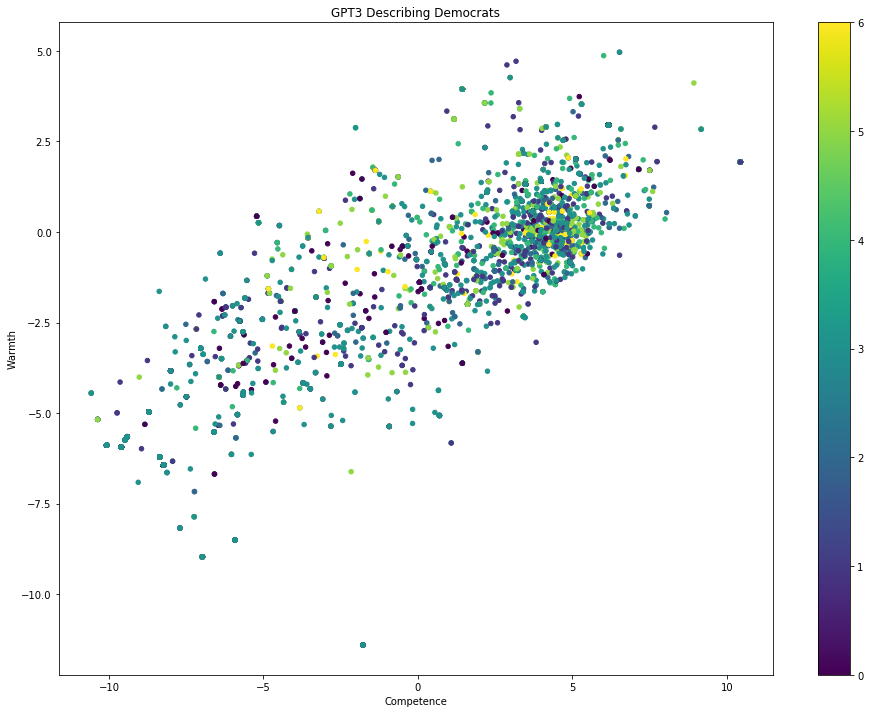

In [481]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0


NW = len(grcompvec)

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x] for x in gridea] 

plt.title("GPT3 Describing Democrats")
plt.scatter( grcompvec+jitter*np.random.randn(NW), grwarmthvec+jitter*np.random.randn(NW), s=20, c=colors)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.xlabel("Competence")
plt.ylabel("Warmth")
plt.colorbar()

# inds = np.random.randint(0,high=NW,size=100)
# for ind in inds:
#     plt.text(dgcompvec[ind],dgwarmthvec[ind],dgwora[ind])
plt.show()

In [ ]:
# gdcompvec = gdvec(compvec)
# gdwarmthvec = gdvec(warmthvec)
# gdidea = gdvec(idea)
# gdwora = gdvec(wora)

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0


NW = len(gdcompvec)

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x] for x in gdidea] 

plt.title("GPT3 Describing Democrats")
plt.scatter( gdcompvec+jitter*np.random.randn(NW), gdwarmthvec+jitter*np.random.randn(NW), s=20, c=colors)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.xlabel("Competence")
plt.ylabel("Warmth")
plt.colorbar()

# inds = np.random.randint(0,high=NW,size=100)
# for ind in inds:
#     plt.text(dgcompvec[ind],dgwarmthvec[ind],dgwora[ind])
plt.show()

In [ ]:
# hrcompvec = hrvec(compvec)
# hrwarmthvec = hrvec(warmthvec)
# hridea = hrvec(idea)
# hrwora = hrvec(wora)

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0


NW = len(hrcompvec)

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x] for x in hridea] 

plt.title("GPT3 Describing Democrats")
plt.scatter( hrcompvec+jitter*np.random.randn(NW), hrwarmthvec+jitter*np.random.randn(NW), s=20, c=colors)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.xlabel("Competence")
plt.ylabel("Warmth")
plt.colorbar()

# inds = np.random.randint(0,high=NW,size=100)
# for ind in inds:
#     plt.text(dgcompvec[ind],dgwarmthvec[ind],dgwora[ind])
plt.show()

In [ ]:
# hdcompvec = hdvec(compvec)
# hdwarmthvec = hdvec(warmthvec)
# hdidea = hdvec(idea)
# hdwora = hdvec(wora)

In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0


NW = len(hdcompvec)

#colors = [ pid_mapper[x[5]] for x in dema ] 
colors = [ ideo_mapper[x] for x in hdidea] 

plt.title("GPT3 Describing Democrats")
plt.scatter( hdcompvec+jitter*np.random.randn(NW), hdwarmthvec+jitter*np.random.randn(NW), s=20, c=colors)
#plt.xlim([20,30])
#plt.ylim([0,10])
plt.xlabel("Competence")
plt.ylabel("Warmth")
plt.colorbar()

# inds = np.random.randint(0,high=NW,size=100)
# for ind in inds:
#     plt.text(dgcompvec[ind],dgwarmthvec[ind],dgwora[ind])
plt.show()

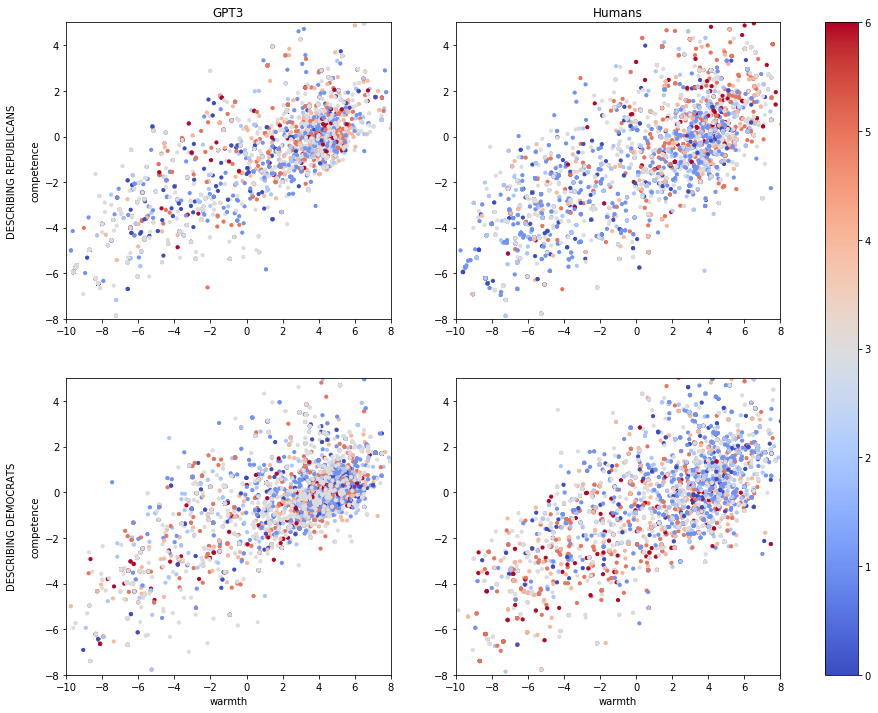

In [533]:
plt.rcParams['figure.figsize'] = [16,12]

jitter = 0.0

fig, axs = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [16,12]

s = 10
a = 1
xlab = 'warmth'
ylab = 'competence'

tmpcomp = grcompvec
tmpwarmth = grwarmthvec
tmpidea = gridea 
tmpwora = grwora
NW = len(tmpcomp)
colors = [ ideo_mapper[x] for x in tmpidea] 
sct =axs[0,0].scatter(tmpcomp+jitter*np.random.randn(NW), tmpwarmth+jitter*np.random.randn(NW), s=s,alpha=a, c=colors,cmap='coolwarm')
axs[0,0].set_title("GPT3")
axs[0,0].set(ylabel="DESCRIBING REPUBLICANS\n\n"+ylab)
axs[0,0].set_ylim([-8,5])
axs[0,0].set_xlim([-10,8])

tmpcomp = gdcompvec
tmpwarmth = gdwarmthvec
tmpidea = gdidea 
tmpwora = gdwora
NW = len(tmpcomp)
colors = [ ideo_mapper[x] for x in tmpidea] 
sct = axs[1,0].scatter(tmpcomp+jitter*np.random.randn(NW), tmpwarmth+jitter*np.random.randn(NW), s=s,alpha=a, c=colors,cmap='coolwarm')
axs[1,0].set(xlabel=xlab, ylabel="DESCRIBING DEMOCRATS\n\n"+ylab)
axs[1,0].set_ylim([-8,5])
axs[1,0].set_xlim([-10,8])

tmpcomp = hrcompvec
tmpwarmth = hrwarmthvec
tmpidea = hridea 
tmpwora = hrwora
NW = len(tmpcomp)
colors = [ ideo_mapper[x] for x in tmpidea] 
sct = axs[0,1].scatter(tmpcomp+jitter*np.random.randn(NW), tmpwarmth+jitter*np.random.randn(NW), s=s,alpha=a, c=colors,cmap='coolwarm')
axs[0,1].set_title('Humans')
axs[0,1].set_ylim([-8,5])
axs[0,1].set_xlim([-10,8])

tmpcomp = hdcompvec
tmpwarmth = hdwarmthvec
tmpidea = hdidea 
tmpwora = hdwora
NW = len(tmpcomp)
colors = [ ideo_mapper[x] for x in tmpidea] 
sct = axs[1,1].scatter(tmpcomp+jitter*np.random.randn(NW), tmpwarmth+jitter*np.random.randn(NW), s=s,alpha=a, c=colors,cmap='coolwarm')
axs[1,1].set(xlabel=xlab)
axs[1,1].set_ylim([-8,5])
axs[1,1].set_xlim([-10,8])

fig.colorbar(sct, ax=axs[:,:])

In [502]:
len(axs.flat)

4